In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import konlpy
import pandas as pd
import re

%matplotlib inline

print(tf.__version__)
print(np.__version__)
print(konlpy.__version__)

2.6.0
1.21.4
0.5.2


In [2]:
!pip install sentencepiece

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


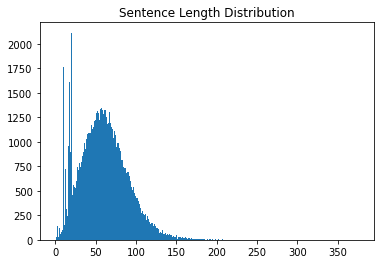

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


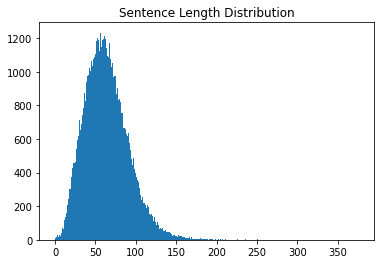

In [5]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

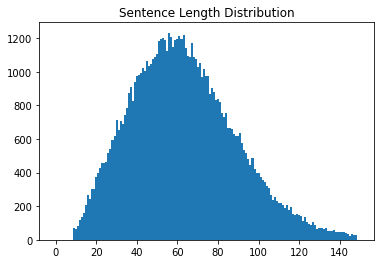

In [6]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## SentencePiece Tokenizer 사용
1. model_type = unnigram
2. model_type = bpe

### model_type = unigram

In [7]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    input=temp_file,
    model_prefix='korean_spm',
    vocab_size=vocab_size,
    model_type='unigram'
)
# 위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.


sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_

In [8]:
!ls -l korean_spm*

-rw-r--r-- 1 root root 376818 May 10 12:54 korean_spm.model
-rw-r--r-- 1 root root 146213 May 10 12:54 korean_spm.vocab


In [9]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [10]:

def sp_tokenize(s, corpus): 

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')

    return tensor, word_index, index_word

In [39]:
train_data = pd.read_table('~/aiffel/sp_tokenizer/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sp_tokenizer/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [12]:
def preprocess(sen):
    # 텍스트에 영어가 있을 경우 소문자로 통일.
    sen = str(sen).lower()
    
    # 불용어 제거
    # ('ㅋ', '.', '~', '!', '?', '~', 'ㅠ', 'ㅜ', '♥', '^')
    stopwords_list = ['ㅋ', '\.', '~', '\!', '\?', 'ㅠ', 'ㅜ', '♥', '\^\^'] # 각 불용어를 리스트로 정의
    stopwords_pattern = '|'.join(stopwords_list) # OR(|) 연산자로 연결하여 패턴 생성

    # 정규표현식을 사용하여 불용어 제거
    sen = re.sub(stopwords_pattern, ' ', sen)
    
    return sen

In [13]:
data['document'] = data['document'].astype(str).apply(preprocess)

In [14]:
data.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [15]:
# data['document']의 모든 텍스트 토큰화
tensor, word_index, index_word = sp_tokenize(s, data.iloc[:]['document'])

In [16]:
word_index

{'<unk>': 0,
 '<s>': 1,
 '</s>': 2,
 '.': 3,
 '▁': 4,
 '을': 5,
 '의': 6,
 '에': 7,
 '이': 8,
 '를': 9,
 '는': 10,
 '가': 11,
 '은': 12,
 ',': 13,
 '고': 14,
 '에서': 15,
 '로': 16,
 '한': 17,
 '▁“': 18,
 '인': 19,
 '”': 20,
 '일': 21,
 ')': 22,
 '(': 23,
 '과': 24,
 '▁이': 25,
 '와': 26,
 '으로': 27,
 '▁있다': 28,
 '지': 29,
 '도': 30,
 '▁수': 31,
 '할': 32,
 '했다': 33,
 '▁밝혔다': 34,
 '▁말했다': 35,
 '하고': 36,
 '년': 37,
 '다': 38,
 '하는': 39,
 '▁있는': 40,
 '기': 41,
 '리': 42,
 '▁그': 43,
 '자': 44,
 '▁전': 45,
 '며': 46,
 '스': 47,
 '해': 48,
 '▁2': 49,
 '▁그는': 50,
 '▁1': 51,
 '만': 52,
 '▁대한': 53,
 '된': 54,
 '▁위해': 55,
 '월': 56,
 '▁전했다': 57,
 '▁미국': 58,
 '▁한': 59,
 '▁미': 60,
 '▁3': 61,
 '▁이번': 62,
 '▁중': 63,
 '▁지난': 64,
 '현지시간': 65,
 '시': 66,
 '라': 67,
 '에게': 68,
 '나': 69,
 '▁대해': 70,
 '어': 71,
 '"': 72,
 '사': 73,
 's': 74,
 '주': 75,
 '▁것으로': 76,
 '▁‘': 77,
 '트': 78,
 '명이': 79,
 '▁것이라고': 80,
 '▁것': 81,
 '이라고': 82,
 '게': 83,
 '들이': 84,
 '▁"': 85,
 '▁4': 86,
 '드': 87,
 '대': 88,
 '▁있다고': 89,
 '하기': 90,
 '르': 91,
 '수': 92,
 '▁것을

In [17]:
tensor

array([[   0,    0,    0, ...,  554,  514, 2648],
       [   0,    0,    0, ..., 1311,  230,   69],
       [   0,    0,    0, ..., 1011,  703,  249],
       ...,
       [   0,    0,    0, ...,    4, 1946,  278],
       [   0,    0,    0, ...,  327,  167,  105],
       [   0,    0,    0, ...,  947, 1086,  216]], dtype=int32)

In [18]:
def load_data(train_data, test_data, s, num_words=10000):
    # 중복 및 결측치 제거
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    # 전처리
    train_data['document'].astype(str).apply(preprocess)
    test_data['document'].astype(str).apply(preprocess)
    
    # SentencePiece 사용해서 토큰화
    train_tokens, word_to_index, index_to_word = sp_tokenize(s, train_data['document'])
    test_tokens, _, _ = sp_tokenize(s, test_data['document'])
    
    return train_tokens, np.array(list(train_data['label'])), test_tokens, np.array(list(test_data['label'])), word_to_index
    
train_data = pd.read_table(os.getenv('HOME')+'/aiffel/sp_tokenizer/data/ratings_train.txt')
test_data = pd.read_table(os.getenv('HOME')+'/aiffel/sp_tokenizer/data/ratings_test.txt')


X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data, s) 

In [19]:
X_train.shape

(146182, 140)

In [20]:
X_test.shape

(49157, 140)

In [21]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [22]:
word_vector_dim = 16

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          128000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 128,881
Trainable params: 128,881
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20

early_stop = EarlyStopping(monitor='val_loss',
                           patience=2,
                           restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stop, checkpoint])

Epoch 1/20
229/229 [==============================] - 43s 11ms/step - loss: 0.6112 - accuracy: 0.7058 - val_loss: 0.4969 - val_accuracy: 0.7971
Epoch 2/20
229/229 [==============================] - 2s 8ms/step - loss: 0.4453 - accuracy: 0.8114 - val_loss: 0.4211 - val_accuracy: 0.8134
Epoch 3/20
229/229 [==============================] - 2s 8ms/step - loss: 0.3959 - accuracy: 0.8281 - val_loss: 0.4050 - val_accuracy: 0.8201
Epoch 4/20
229/229 [==============================] - 2s 8ms/step - loss: 0.3808 - accuracy: 0.8354 - val_loss: 0.4020 - val_accuracy: 0.8205
Epoch 5/20
229/229 [==============================] - 2s 8ms/step - loss: 0.3730 - accuracy: 0.8401 - val_loss: 0.3994 - val_accuracy: 0.8213
Epoch 6/20
229/229 [==============================] - 2s 8ms/step - loss: 0.3666 - accuracy: 0.8433 - val_loss: 0.3996 - val_accuracy: 0.8215
Epoch 7/20
229/229 [==============================] - 2s 9ms/step - loss: 0.3606 - accuracy: 0.8465 - val_loss: 0.3974 - val_accuracy: 0.8229
Epoc

In [24]:
results = model.evaluate(X_test, y_test, verbose=1)
print(results)

1537/1537 [==============================] - 5s 3ms/step - loss: 0.3922 - accuracy: 0.8270
[0.3921646177768707, 0.8269625902175903]


### model_type=bpe

In [25]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    input=temp_file,
    model_prefix='korean_spm',
    vocab_size=vocab_size,
    model_type='bpe'
)

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dumm

In [26]:
s.load('korean_spm.model')

7) LOG(INFO) Updating active symbols. max_freq=959 min_freq=93
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=914 size=520 all=100009 active=5662 piece=▁지원
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=886 size=540 all=100963 active=6616 piece=▁채
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=863 size=560 all=101872 active=7525 piece=장이
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=835 size=580 all=102527 active=8180 piece=▁없다
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=809 size=600 all=103222 active=8875 piece=▁휴
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=808 min_freq=87
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=778 size=620 all=104234 active=6140 piece=▁나타
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=758 size=640 all=105000 active=6906 piece=▁a
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=739 size=660 all=106070 active=7976 piece=▁the
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=722 size=680 all=107085 active=8991 piece=▁K
bpe_model

True

0 all=179662 active=9202 piece=▁것도
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=129 size=3240 all=179961 active=9501 piece=분이
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=128 size=3260 all=180452 active=9992 piece=▁기본
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=127 size=3280 all=180817 active=10357 piece=▁저항
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=126 size=3300 all=181086 active=10626 piece=▁산불
bpe_model_trainer.cc(167) LOG(INFO) Updating active symbols. max_freq=126 min_freq=31
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=125 size=3320 all=181323 active=9283 piece=만의
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=125 size=3340 all=181793 active=9753 piece=▁부시는
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=124 size=3360 all=182129 active=10089 piece=▁연장
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=124 size=3380 all=182369 active=10329 piece=▁전망이다
bpe_model_trainer.cc(258) LOG(INFO) Added: freq=123 size=3400 all=182764 active=10724 piece=▁허가
bpe_model_trainer.

In [27]:
# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1520, 1154, 6614, 6710, 2644, 6782, 6685, 6687]
['▁아버', '지가', '방에', '들', '어가', '신', '다', '.']
아버지가방에들어가신다.


In [28]:
# 모델 구조는 동일

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          128000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 128,881
Trainable params: 128,881
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
# 학습
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    callbacks=[early_stop, checkpoint])

Epoch 1/20
229/229 [==============================] - 4s 11ms/step - loss: 0.4796 - accuracy: 0.7766 - val_loss: 0.4130 - val_accuracy: 0.8149
Epoch 2/20
229/229 [==============================] - 2s 9ms/step - loss: 0.3911 - accuracy: 0.8300 - val_loss: 0.4035 - val_accuracy: 0.8185
Epoch 3/20
229/229 [==============================] - 2s 9ms/step - loss: 0.3779 - accuracy: 0.8365 - val_loss: 0.4022 - val_accuracy: 0.8207
Epoch 4/20
229/229 [==============================] - 2s 9ms/step - loss: 0.3702 - accuracy: 0.8405 - val_loss: 0.3986 - val_accuracy: 0.8207
Epoch 5/20
229/229 [==============================] - 2s 9ms/step - loss: 0.3640 - accuracy: 0.8441 - val_loss: 0.3958 - val_accuracy: 0.8229
Epoch 6/20
229/229 [==============================] - 2s 9ms/step - loss: 0.3588 - accuracy: 0.8459 - val_loss: 0.3949 - val_accuracy: 0.8233
Epoch 7/20
229/229 [==============================] - 2s 9ms/step - loss: 0.3533 - accuracy: 0.8486 - val_loss: 0.4056 - val_accuracy: 0.8190
Epoch

회고: sentencepiece trainer에서 model_type이 unigram일 때, bpe일 때 변화가 거의 없다.

## KoNLPY Tokenizer 사용
1. Okt
2. Hannanum
3. Komoran

In [31]:
from konlpy.tag import Okt

okt = Okt()

In [32]:
def tokenize(text):
    return ['/'.join(t) for t in okt.pos(text, norm=True, stem=True)]

In [34]:
# Tokenization 함수화

def konlpy_tokenize(tokenizer_instance, corpus, num_words=10000):
    # 1. KoNLPy 토크나이저로 토큰화 (형태소 분석)
    # Okt의 경우: okt.morphs(sentence, stem=True) 또는 okt.nouns(sentence) 등
    # Hannanum의 경우: hannanum.morphs(sentence)
    # Komoran의 경우: komoran.morphs(sentence)
    # 여기서는 okt.morphs와 유사하게 일반적인 형태소 분석을 가정합니다.
    # 각 토크나이저의 특성에 맞게 tokenize_fn을 호출 시점에 정의합니다.

    tokenized_corpus = []
    if isinstance(tokenizer_instance, Okt):
        tokenize_fn = lambda text: tokenizer_instance.morphs(text, stem=True)
    elif isinstance(tokenizer_instance, Hannanum):
        tokenize_fn = lambda text: tokenizer_instance.morphs(text)
    elif isinstance(tokenizer_instance, Komoran):
        tokenize_fn = lambda text: tokenizer_instance.morphs(text)
    else:
        raise ValueError("Unsupported tokenizer type")

    for sen in corpus:
        tokenized_corpus.append(tokenize_fn(str(sen)))
        
    # 2. Keras Tokenizer를 사용하여 단어 사전을 만들고 정수 인코딩
    keras_tokenizer = Tokenizer(num_words=num_words, oov_token="<unk>") # num_words는 충분히 큰 값으로 설정 가능
    keras_tokenizer.fit_on_texts(tokenized_corpus)
    
    tensor = keras_tokenizer.texts_to_sequences(tokenized_corpus)

    # 3. 패딩
    tensor = pad_sequences(tensor, padding='pre', maxlen=X_train.shape[1] if 'X_train' in globals() else 140) # maxlen은 sentencepiece와 동일하게
    word_index = keras_tokenizer.word_index
    index_word = {idx: word for word, idx in word_index.items()}

    return tensor, word_index, index_word

In [35]:
def load_data_konlpy(train_data, test_data, konlpy_tokenizer_instance, num_words=10000):
    # 중복 및 결측치 제거
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    # 전처리 (기존 preprocess 함수 사용)
    train_data['document'] = train_data['document'].astype(str).apply(preprocess)
    test_data['document'] = test_data['document'].astype(str).apply(preprocess)
    
    # KoNLPy 토크나이저를 사용하여 토큰화 및 패딩
    train_tokens, word_to_index, index_to_word = konlpy_tokenize(konlpy_tokenizer_instance, train_data['document'], num_words=num_words)
    test_tokens, _, _ = konlpy_tokenize(konlpy_tokenizer_instance, test_data['document'], num_words=num_words) # 테스트 데이터는 학습된 word_to_index 사용
    
    # word_to_index에 num_words 제한 적용 (Keras Tokenizer에서 이미 처리하지만 명시적으로)
    limited_word_to_index = {k: v for k, v in word_to_index.items() if v < num_words}
    
    return train_tokens, np.array(list(train_data['label'])), test_tokens, np.array(list(test_data['label'])), limited_word_to_index, index_to_word



In [36]:
# 모델 정의 (SentencePiece와 동일한 구조 사용)
def build_model(vocab_size, word_vector_dim=16):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
    model.add(tf.keras.layers.LSTM(8))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    return model

In [37]:
# 모델 학습 및 평가 함수
def train_and_evaluate_model(model, X_train_split, y_train_split, X_val_split, y_val_split, X_test_data, y_test_data, epochs=20, batch_size=512):
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    # 각 토크나이저별 모델 저장 경로 다르게 설정
    model_filename = f'best_model_{model.name}.h5' 
    checkpoint = ModelCheckpoint(model_filename, monitor='val_loss', save_best_only=True)

    history = model.fit(X_train_split,
                        y_train_split,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_val_split, y_val_split),
                        verbose=1,
                        callbacks=[early_stop, checkpoint])
    
    print(f"======== {model.name} Test Results ========")
    results = model.evaluate(X_test_data, y_test_data, verbose=1)
    print(f"Loss: {results[0]}, Accuracy: {results[1]}")
    return history, results

### Okt 사용

In [1]:
# Okt를 사용하여 데이터 로드
# num_words는 SentencePiece에서 사용한 vocab_size와 유사한 개념으로 사용
# 실제 KoNLPy 토크나이저의 단어 집합 크기는 Keras Tokenizer에 의해 결정됨

X_train_okt, y_train_okt, X_test_okt, y_test_okt, word_to_index_okt, index_to_word_okt = load_data_konlpy(
    train_data.copy(), test_data.copy(), okt, num_words=vocab_size
)


print("Okt Tokenizer")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

NameError: name 'load_data_konlpy' is not defined

In [ ]:
# Okt 모델 빌드
model_okt = build_model(vocab_size=len(word_to_index_okt) + 1) # 실제 생성된 단어 수 + OOV
model_okt._name = 'okt_model'
model_okt.summary()

In [ ]:
# Okt 모델 학습 및 평가
history_okt, results_okt = train_and_evaluate_model(
    model_okt, X_train_okt, y_train_okt, X_val_okt, y_val_okt, X_test_okt, y_test_okt
)

## 회고
- SentencePiece Tokenizer에서 unigram과 bpe 사이의 유의미한 차이는 없었다.
- Okt, Hannanum, Komoran도 비교해보고 싶었지만 시간이 예상보다 훨씬 오래 걸려 실험해보지 못한 점이 아쉬웠다.